# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [4]:
# Load pickled data
import pickle
# TODO: Fill this in based on where you saved the training and testing data

training_file = "/home/lkc-u330/Desktop/CarND-Traffic-Sign-Classifier-Project/CarND-Traffic-Sign-Classifier-Project/train.p"
validation_file= "/home/lkc-u330/Desktop/CarND-Traffic-Sign-Classifier-Project/CarND-Traffic-Sign-Classifier-Project/valid.p"
testing_file = "/home/lkc-u330/Desktop/CarND-Traffic-Sign-Classifier-Project/CarND-Traffic-Sign-Classifier-Project/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
train_features, train_labels, train_sizes, train_coords = train['features'], train['labels'] , train['sizes'] , train['coords']
valid_features, valid_labels, valid_sizes, valid_coords = valid['features'], valid['labels'], valid['sizes'], valid['coords']
test_features, test_labels, test_sizes, test_coords = test['features'], test['labels'], test['sizes'], test['coords']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas
import numpy

# TODO: Number of training examples
n_train = len(train_features)

# TODO: Number of testing examples.
n_test = len(test_features)

# TODO: What's the shape of an traffic sign image?
image_shape = numpy.asarray(numpy.array(train_features).shape)[1:3:1]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(numpy.unique(train_labels))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = [32 32]
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

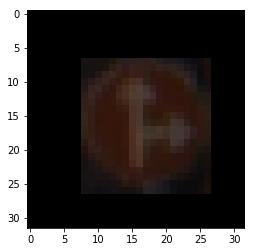

 39%|███▊      | 9576/24799 [01:10<01:51, 136.54it/s]

In [8]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import cv2
import math
from tqdm import *

# Visualizations will be shown in the notebook.
%matplotlib inline

#retrieve data in 4-d array from dataset,and construct and return an 3-d array representing an image
def reshapeImagesFromDataset(dataset, start=0, end=0, image_shape=image_shape):
    return dataset[start:end]

def displayImages(imageset):
    for num in range(0, len(imageset)):
        plt.figure()
        plt.imshow(imageset[num])

def regionOfInterest(img, vertices):
    mask = numpy.zeros_like(img)   
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def verticesFromDatasets(coords, sizes, num, image_shape=image_shape):
    result = []
    width, height = sizes[num][0], sizes[num][1]
    x1,y1,x2,y2 = coords[num][0], coords[num][1], coords[num][2], coords[num][3]
    x_ratio, y_ratio = image_shape[0]/width, image_shape[1]/height
    result.append((math.ceil(x1*x_ratio),math.ceil(y1*y_ratio)))
    result.append((math.ceil(x2*x_ratio), math.ceil(y1*y_ratio)))
    result.append((math.ceil(x2*x_ratio), math.ceil(y2*y_ratio)))
    result.append((math.ceil(x1*x_ratio), math.ceil(y2*y_ratio)))
    return result
  
def maskedImagesFromDatasets(features, sizes, coords, start, end, image_shape=image_shape):
    masked_images=[]
    images = numpy.array(reshapeImagesFromDataset(features, start, end, image_shape))
    for num in tqdm(range(0, len(images))):
        opencvImage = cv2.cvtColor(images[num], cv2.COLOR_RGB2BGR)
        masked_images.append(regionOfInterest(opencvImage, numpy.array([verticesFromDatasets(coords, sizes, num+start)])))
    return masked_images
#test
img = numpy.array(reshapeImagesFromDataset(train_features,1000,1020)[0])
opencvImage = cv2.cvtColor(numpy.array(img), cv2.COLOR_RGB2BGR)
plt.imshow(regionOfInterest(opencvImage, numpy.array([verticesFromDatasets(train_coords,train_sizes,0)])))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.


  6%|▌         | 1542/24799 [00:00<00:01, 15417.04it/s]

maskedImagesFromDatasets...



  0%|          | 1/24799 [00:00<58:39,  7.05it/s]

grayScaleImage & normalization...



 32%|███▏      | 1408/4410 [00:00<00:00, 14070.65it/s]

Task:train_features_gray is completed

maskedImagesFromDatasets...


  0%|          | 0/4410 [00:00<?, ?it/s]

grayScaleImage & normalization...


 13%|█▎        | 1701/12630 [00:00<00:00, 17001.14it/s]

Task:valid_features_gray is completed

maskedImagesFromDatasets...


  0%|          | 0/12630 [00:00<?, ?it/s]

grayScaleImage & normalization...


100%|██████████| 1/1 [00:00<00:00, 2794.34it/s]


Task:test_features_gray is completed

Task:train_labels_43 is completed

Task:valid_labels_43 is completed

Task:test_labels_43 is completed

-1.0


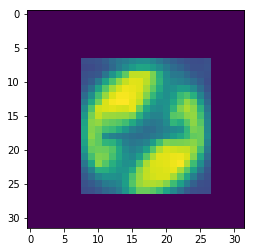

In [9]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from tqdm import *
import gc

# convert from a three channel color pixel into one channel gray pixel
# e.g. input: [24, 36, 80] => [gray-scaled-value]
def rgb2gray(rgb):
    return numpy.dot(rgb[...,:3], [0.299, 0.587, 0.114])
            
def grayScaleImage(image, image_shape=image_shape):
    result_image = []
    for x in range(0, image_shape[0]):
        column = []
        for y in range(0, image_shape[1]):
            column.append(rgb2gray(numpy.array(image[x][y])).tolist())
        result_image.append(column)
    image = result_image
    return image

# divide difference between value of a pixal and half of maximum value achievable of a pixal by half of maximum value achievable of a pixal
# input: image,which is one channel gray scale image
def normalizeImage(image, image_shape=image_shape):
    result_image = []
    for x in range(0, image_shape[0]):
        column = []
        for y in range(0, image_shape[1]):
            column.append((image[x][y]-128)/128)
        result_image.append(column)
    image = result_image
    return image

# convert 2-d grayscale image to 3-d array with format:
# [x][y][channel] i.e. [31][31][0]
def reshapeGrayScaleImage(image, image_shape=image_shape):
    result_image = []
    for x in range(0, image_shape[0]):
        column = []
        for y in range(0, image_shape[1]):
            temp = []
            temp.append(image[x][y])
            column.append(temp)
        result_image.append(column)
    image = result_image
    return image

# convert 2-d grayscale image to 1-d array
def reshapeGrayScaleImage2(image, image_shape=image_shape):
    result_array = []
    for x in range(0, image_shape[0]):
        for y in range(0, image_shape[1]):
            result_array.append(image[x][y])
    image=result_array
    return image

# calling functions in sequence: maskedImagesFromDatasets->grayScaleImage->normalizeImage->reshapeGrayScaleImage2
def prepareImages(features, sizes, coords, start=0, end=0):
    prepared_images=[]
    print("maskedImagesFromDatasets...")
    temp = maskedImagesFromDatasets(features, sizes, coords, start, end, image_shape)
    print("grayScaleImage & normalization...")
    for num in tqdm(range(0, end-start)):
        result1 = grayScaleImage(temp[num])
        result2 = normalizeImage(result1)
        result3 = reshapeGrayScaleImage2(result2)
        if num%10000 == 0:
            gc.collect()
        prepared_images.append(result3)
    return prepared_images

# return a 2d-array with inner arrays,each one of arrays is assigned with zero value of desired length 
# except the dedicated position of the array is assigned with value of one
def preparelabels(dataset, length):
    result = []
    for num in range(0,len(dataset)):
        #print(dataset[num])
        temp = numpy.zeros(length)
        temp[dataset[num]] = 1
        result.append(temp)
    #result = numpy.reshape(result, (-1, 43))
    return result

# prepared data
train_features_gray = prepareImages(train_features,train_sizes,train_coords, 0, n_train-10000)
print("Task:train_features_gray is completed")
print()
valid_features_gray = prepareImages(valid_features,valid_sizes,valid_coords, 0, len(valid_features))
print("Task:valid_features_gray is completed")
print()
test_features_gray = prepareImages(test_features,test_sizes,test_coords, 0, n_test)
print("Task:test_features_gray is completed")
print()
train_labels_43 = preparelabels(train_labels, 43)
print("Task:train_labels_43 is completed")
print()
valid_labels_43 = preparelabels(valid_labels, 43)
print("Task:valid_labels_43 is completed")
print()
test_labels_43 = preparelabels(test_labels, 43)
print("Task:test_labels_43 is completed")
print()

# test code
img = maskedImagesFromDatasets(train_features,train_sizes,train_coords, 0 , 1)
test = grayScaleImage(img[0])
plt.imshow(test)
test2 = reshapeGrayScaleImage(normalizeImage(test))
print(test2[31][31][0])

### Model Architecture

In [24]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
x = tf.placeholder(tf.float32, (None, image_shape[0] * image_shape[1]))
y = tf.placeholder(tf.int32, (None, n_classes))
#one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

def convNet(x, weight, biases, dropout):
    # Reshape from 2D to 4D. This prepares the data for
    # convolutional and pooling layers.
    x = tf.reshape(x, (-1, image_shape[0], image_shape[1], 1))
    
    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)
    
    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)
    
    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)
    #fc2 = tf.add(tf.matmul(fc2, weights['wd2']), biases['bd2'])
    #fc2 = tf.nn.relu(fc2)
    #fc3 = tf.reshape(fc2, [-1, weights['wd3'].get_shape().as_list()[0]])
    #fc3 = tf.add(tf.matmul(fc3, weights['wd3']), biases['bd3'])
    #fc3 = tf.nn.relu(fc3)
    # Apply Dropout
    #fc3 = tf.nn.dropout(fc3, dropout)
    
    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    
    return out

# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 8*8*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([8*8*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.truncated_normal([32])),
    'bc2': tf.Variable(tf.truncated_normal([64])),
    'bd1': tf.Variable(tf.truncated_normal([1024])),
    'out': tf.Variable(tf.truncated_normal([n_classes]))
}

pred = convNet(x, weights, biases, keep_prob)
#Define loss and optimization
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
learning_rate = 0.0000001
opt = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = opt.minimize(cost)

# Evaluate model
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [25]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
num_of_epochs = 10
batch_size= 120
training_iters = n_train-10000
dropout = 0.5 # Dropout, probability to keep units
display_step = 10

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for num in tqdm(range(num_of_epochs)):
        print("EPOCHS " + str(num))
        step = 1
        # Keep training until reach max iterations
        while step * batch_size < training_iters:
            batch_x = train_features_gray[(step-1)*batch_size:step*batch_size]
            batch_y = train_labels_43[(step-1)*batch_size:step*batch_size]
            # Run optimization op (backprop)
            sess.run(train_op, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})

            if step % display_step == 0:
                # Calculate batch loss and accuracy
                loss, acc = sess.run([cost, accuracy_op], feed_dict={x: valid_features_gray,y: valid_labels_43, keep_prob: 1})
                print("Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                       "{:.6f}".format(loss) + ", Training Accuracy= " + \
                       "{:.5f}".format(acc))

            step += 1
    print("Optimization Finished!")

    
    print("Testing Accuracy:", \
        sess.run(accuracy_op, feed_dict={x: test_features_gray[:n_test],
                                      y: test_labels_43[:n_test],
                                      keep_prob: 1.}))


  0%|          | 0/10 [00:00<?, ?it/s]

EPOCHS 0


Iter 1200, Minibatch Loss= 134961.515625, Training Accuracy= 0.03039
Iter 2400, Minibatch Loss= 131374.171875, Training Accuracy= 0.02925
Iter 3600, Minibatch Loss= 127754.648438, Training Accuracy= 0.03016
Iter 4800, Minibatch Loss= 125060.195312, Training Accuracy= 0.03107
Iter 6000, Minibatch Loss= 123475.312500, Training Accuracy= 0.03220
Iter 7200, Minibatch Loss= 121334.093750, Training Accuracy= 0.03923
Iter 8400, Minibatch Loss= 116684.562500, Training Accuracy= 0.04286
Iter 9600, Minibatch Loss= 113537.617188, Training Accuracy= 0.04286
Iter 10800, Minibatch Loss= 111943.500000, Training Accuracy= 0.04059
Iter 12000, Minibatch Loss= 110156.187500, Training Accuracy= 0.04104
Iter 13200, Minibatch Loss= 107634.929688, Training Accuracy= 0.04127
Iter 14400, Minibatch Loss= 105460.007812, Training Accuracy= 0.04172
Iter 15600, Minibatch Loss= 104768.875000, Training Accuracy= 0.03741
Iter 16800, Minibatch Loss= 103528.632812, Training Accuracy= 0.03719
Iter 18000, Minibatch Loss= 

 10%|█         | 1/10 [04:45<42:49, 285.53s/it]

EPOCHS 1
Iter 1200, Minibatch Loss= 94010.179688, Training Accuracy= 0.05215
Iter 2400, Minibatch Loss= 92466.359375, Training Accuracy= 0.05329
Iter 3600, Minibatch Loss= 93229.851562, Training Accuracy= 0.04603
Iter 4800, Minibatch Loss= 93397.890625, Training Accuracy= 0.04376
Iter 6000, Minibatch Loss= 91837.046875, Training Accuracy= 0.04331
Iter 7200, Minibatch Loss= 90897.492188, Training Accuracy= 0.04626
Iter 8400, Minibatch Loss= 89637.679688, Training Accuracy= 0.04263
Iter 9600, Minibatch Loss= 87898.046875, Training Accuracy= 0.04286
Iter 10800, Minibatch Loss= 87158.671875, Training Accuracy= 0.04399
Iter 12000, Minibatch Loss= 85869.914062, Training Accuracy= 0.04444
Iter 13200, Minibatch Loss= 84984.289062, Training Accuracy= 0.04376
Iter 14400, Minibatch Loss= 84254.593750, Training Accuracy= 0.04218
Iter 15600, Minibatch Loss= 83599.132812, Training Accuracy= 0.04172
Iter 16800, Minibatch Loss= 83074.828125, Training Accuracy= 0.03855
Iter 18000, Minibatch Loss= 83133

 20%|██        | 2/10 [09:40<38:26, 288.27s/it]

EPOCHS 2
Iter 1200, Minibatch Loss= 78462.078125, Training Accuracy= 0.05442
Iter 2400, Minibatch Loss= 77780.734375, Training Accuracy= 0.05306
Iter 3600, Minibatch Loss= 79577.554688, Training Accuracy= 0.04626
Iter 4800, Minibatch Loss= 79979.343750, Training Accuracy= 0.04649
Iter 6000, Minibatch Loss= 78616.750000, Training Accuracy= 0.04649
Iter 7200, Minibatch Loss= 77715.750000, Training Accuracy= 0.04444
Iter 8400, Minibatch Loss= 77022.046875, Training Accuracy= 0.04467
Iter 9600, Minibatch Loss= 75533.414062, Training Accuracy= 0.04331
Iter 10800, Minibatch Loss= 74904.546875, Training Accuracy= 0.04308
Iter 12000, Minibatch Loss= 73670.085938, Training Accuracy= 0.04286
Iter 13200, Minibatch Loss= 73196.710938, Training Accuracy= 0.04286
Iter 14400, Minibatch Loss= 72924.437500, Training Accuracy= 0.04286
Iter 15600, Minibatch Loss= 72284.648438, Training Accuracy= 0.04127
Iter 16800, Minibatch Loss= 71763.960938, Training Accuracy= 0.03900
Iter 18000, Minibatch Loss= 72199

 30%|███       | 3/10 [14:33<33:48, 289.82s/it]

EPOCHS 3
Iter 1200, Minibatch Loss= 68935.687500, Training Accuracy= 0.05306
Iter 2400, Minibatch Loss= 68704.132812, Training Accuracy= 0.05238
Iter 3600, Minibatch Loss= 70611.679688, Training Accuracy= 0.04898
Iter 4800, Minibatch Loss= 71096.820312, Training Accuracy= 0.04785
Iter 6000, Minibatch Loss= 69916.054688, Training Accuracy= 0.04830
Iter 7200, Minibatch Loss= 69010.757812, Training Accuracy= 0.04671
Iter 8400, Minibatch Loss= 68150.500000, Training Accuracy= 0.04603
Iter 9600, Minibatch Loss= 66842.468750, Training Accuracy= 0.04422
Iter 10800, Minibatch Loss= 66349.523438, Training Accuracy= 0.04444
Iter 12000, Minibatch Loss= 65307.945312, Training Accuracy= 0.04286
Iter 13200, Minibatch Loss= 65118.765625, Training Accuracy= 0.04354
Iter 14400, Minibatch Loss= 65083.429688, Training Accuracy= 0.04308
Iter 15600, Minibatch Loss= 64567.820312, Training Accuracy= 0.04172
Iter 16800, Minibatch Loss= 64215.617188, Training Accuracy= 0.03968
Iter 18000, Minibatch Loss= 64877

 40%|████      | 4/10 [19:25<29:02, 290.46s/it]

EPOCHS 4
Iter 1200, Minibatch Loss= 62504.894531, Training Accuracy= 0.05351
Iter 2400, Minibatch Loss= 62283.050781, Training Accuracy= 0.05170
Iter 3600, Minibatch Loss= 63947.777344, Training Accuracy= 0.04739
Iter 4800, Minibatch Loss= 64418.910156, Training Accuracy= 0.04807
Iter 6000, Minibatch Loss= 63360.863281, Training Accuracy= 0.04717
Iter 7200, Minibatch Loss= 62516.152344, Training Accuracy= 0.04626
Iter 8400, Minibatch Loss= 61891.757812, Training Accuracy= 0.04603
Iter 9600, Minibatch Loss= 60818.625000, Training Accuracy= 0.04580
Iter 10800, Minibatch Loss= 60484.949219, Training Accuracy= 0.04558
Iter 12000, Minibatch Loss= 59628.507812, Training Accuracy= 0.04422
Iter 13200, Minibatch Loss= 59574.761719, Training Accuracy= 0.04399
Iter 14400, Minibatch Loss= 59599.167969, Training Accuracy= 0.04399
Iter 15600, Minibatch Loss= 59094.289062, Training Accuracy= 0.04308
Iter 16800, Minibatch Loss= 58897.390625, Training Accuracy= 0.04036
Iter 18000, Minibatch Loss= 59446

 50%|█████     | 5/10 [24:34<24:40, 296.01s/it]

EPOCHS 5
Iter 1200, Minibatch Loss= 57971.746094, Training Accuracy= 0.05079
Iter 2400, Minibatch Loss= 57869.996094, Training Accuracy= 0.04989
Iter 3600, Minibatch Loss= 59347.675781, Training Accuracy= 0.04762
Iter 4800, Minibatch Loss= 59745.605469, Training Accuracy= 0.04717
Iter 6000, Minibatch Loss= 58819.132812, Training Accuracy= 0.04739
Iter 7200, Minibatch Loss= 58087.878906, Training Accuracy= 0.04626
Iter 8400, Minibatch Loss= 57550.585938, Training Accuracy= 0.04626
Iter 9600, Minibatch Loss= 56627.183594, Training Accuracy= 0.04512
Iter 10800, Minibatch Loss= 56299.753906, Training Accuracy= 0.04467
Iter 12000, Minibatch Loss= 55694.464844, Training Accuracy= 0.04376
Iter 13200, Minibatch Loss= 55721.507812, Training Accuracy= 0.04331
Iter 14400, Minibatch Loss= 55719.617188, Training Accuracy= 0.04331
Iter 15600, Minibatch Loss= 55337.109375, Training Accuracy= 0.04104
Iter 16800, Minibatch Loss= 55208.324219, Training Accuracy= 0.03946
Iter 18000, Minibatch Loss= 55756

 60%|██████    | 6/10 [29:32<19:46, 296.51s/it]

EPOCHS 6
Iter 1200, Minibatch Loss= 54833.343750, Training Accuracy= 0.05351


KeyboardInterrupt: 

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 